In [1]:
# Handwritten Digit Recognition with LeNet5 Model in PyTorch

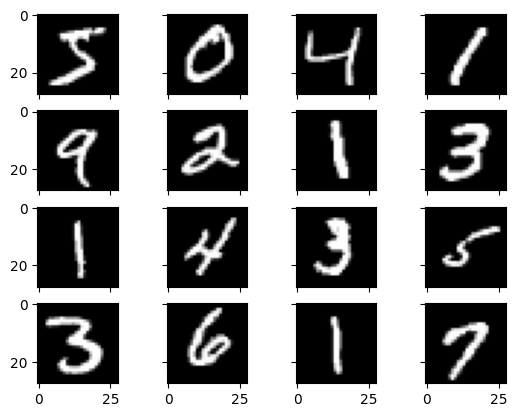

In [2]:
# Loading the MNIST Dataset in PyTorch
import matplotlib.pyplot as plt
import torchvision

train = torchvision.datasets.MNIST('./data', train=True, download=True)

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train.data[4*i+j], cmap="gray")
plt.show()

In [ ]:
# Baseline Model with Multilayer Perceptrons
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

# Load MNIST data
train = torchvision.datasets.MNIST('data', train=True, download=True)
test = torchvision.datasets.MNIST('data', train=True, download=True)
print(train.data.shape, train.targets.shape)
print(test.data.shape, test.targets.shape)

In [ ]:
# each sample becomes a vector of values 0-1
X_train = train.data.reshape(-1, 784).float() / 255.0
y_train = train.targets
X_test = test.data.reshape(-1, 784).float() / 255.0
y_test = test.targets

In [5]:
# You are now ready to create your simple neural network model. 
# You will define your model in a PyTorch Module class.


class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 784)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.layer2(x)
        return x

In [6]:
# ou will use the stochastic gradient descent algorithm 
# (with learning rate set to 0.01)
# to optimize this model. 
# The training loop is as follows:

model = Baseline()

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=100)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    y_pred = model(X_test)
    acc = (torch.argmax(y_pred, 1) == y_test).float().mean()
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 83.69%
Epoch 1: model accuracy 87.62%
Epoch 2: model accuracy 88.85%
Epoch 3: model accuracy 89.71%
Epoch 4: model accuracy 90.21%
Epoch 5: model accuracy 90.66%
Epoch 6: model accuracy 91.15%
Epoch 7: model accuracy 91.47%
Epoch 8: model accuracy 91.66%
Epoch 9: model accuracy 92.02%


In [7]:
# Below is the complete code for the above multilayer perceptron classification on MNIST dataset.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

# Load MNIST data
train = torchvision.datasets.MNIST('data', train=True, download=True)
test = torchvision.datasets.MNIST('data', train=True, download=True)

# each sample becomes a vector of values 0-1
X_train = train.data.reshape(-1, 784).float() / 255.0
y_train = train.targets
X_test = test.data.reshape(-1, 784).float() / 255.0
y_test = test.targets

class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 784)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.layer2(x)
        return x
    
model = Baseline()

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=100)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    y_pred = model(X_test)
    acc = (torch.argmax(y_pred, 1) == y_test).float().mean()
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 84.32%
Epoch 1: model accuracy 87.68%
Epoch 2: model accuracy 88.89%
Epoch 3: model accuracy 89.76%
Epoch 4: model accuracy 90.26%
Epoch 5: model accuracy 90.72%
Epoch 6: model accuracy 91.11%
Epoch 7: model accuracy 91.51%
Epoch 8: model accuracy 91.83%
Epoch 9: model accuracy 92.09%


In [ ]:
# Simple Convolutional Neural Network for MNIST

...
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0,), (128,)),
])
train = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=100)
testloader = torch.utils.data.DataLoader(test, shuffle=True, batch_size=100)

In [ ]:
# This model is trained using cross entropy loss and the Adam optimiztion algorithm. 
# It is implemented as follows:

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        self.dropout = nn.Dropout(0.2)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(27*27*10, 128)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.relu1(self.conv(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.relu2(self.fc(self.flat(x)))
        x = self.output(x)
        return x
    
model = CNN()

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in trainloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    acc = 0
    count = 0
    for X_batch, y_batch in testloader:
        y_pred = model(X_batch)
        acc += (torch.argmax(y_pred, 1) == y_batch).float().sum()
        count += len(y_batch)
    acc = acc / count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 70.81%
Epoch 1: model accuracy 77.42%
Epoch 2: model accuracy 87.88%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

# Load MNIST data
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0,), (128,)),
])
train = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=100)
testloader = torch.utils.data.DataLoader(test, shuffle=True, batch_size=100)

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        self.dropout = nn.Dropout(0.2)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(27*27*10, 128)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.relu1(self.conv(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.relu2(self.fc(self.flat(x)))
        x = self.output(x)
        return x
    
model = CNN()

optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in trainloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    acc = 0
    count = 0
    for X_batch, y_batch in testloader:
        y_pred = model(X_batch)
        acc += (torch.argmax(y_pred, 1) == y_batch).float().sum()
        count += len(y_batch)
    acc = acc / count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

# Load MNIST data
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0,), (128,)),
])
train = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=100)
testloader = torch.utils.data.DataLoader(test, shuffle=True, batch_size=100)

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.act1 = nn.Tanh()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.act2 = nn.Tanh()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)
        self.act3 = nn.Tanh()

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(1*1*120, 84)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        # input 1x28x28, output 6x28x28
        x = self.act1(self.conv1(x))
        # input 6x28x28, output 6x14x14
        x = self.pool1(x)
        # input 6x14x14, output 16x10x10
        x = self.act2(self.conv2(x))
        # input 16x10x10, output 16x5x5
        x = self.pool2(x)
        # input 16x5x5, output 120x1x1
        x = self.act3(self.conv3(x))
        # input 120x1x1, output 84
        x = self.act4(self.fc1(self.flat(x)))
        # input 84, output 10
        x = self.fc2(x)
        return x

model = LeNet5()

optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in trainloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    acc = 0
    count = 0
    for X_batch, y_batch in testloader:
        y_pred = model(X_batch)
        acc += (torch.argmax(y_pred, 1) == y_batch).float().sum()
        count += len(y_batch)
    acc = acc / count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))